# **End-to-end Sentiment Analysis Example in Python**

### **Step 1 - Import libraries and load dataset**

In [ ]:
# import libraries
import pandas as pd

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer


# download nltk corpus (first time only)
import nltk

nltk.download('all')




# Load the amazon review dataset

df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')

df

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


### **Step 2 - Preprocess text**

In [ ]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())




    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]




    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]




    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function df

df['reviewText'] = df['reviewText'].apply(preprocess_text)
df

,reviewText,Positive
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free . lot different ...,1
2,really cool game . bunch level find golden egg...,1
3,"silly game frustrating , lot fun definitely re...",1
4,terrific game pad . hr fun . grandkids love . ...,1
...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1
19997,love ! game . awesome . wish free stuff house ...,1
19998,love love love app side fashion story fight wo...,1


### **Step 3 - NLTK Sentiment Analyzer**

In [ ]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment




# apply get_sentiment function

df['sentiment'] = df['reviewText'].apply(get_sentiment)

df


,reviewText,Positive,sentiment
0,one best apps acording bunch people agree bomb...,1,1
1,pretty good version game free . lot different ...,1,1
2,really cool game . bunch level find golden egg...,1,1
3,"silly game frustrating , lot fun definitely re...",1,1
4,terrific game pad . hr fun . grandkids love . ...,1,1
...,...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1,1
19997,love ! game . awesome . wish free stuff house ...,1,1
19998,love love love app side fashion story fight wo...,1,1


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'actual' and 'predicted' columns are in your dataframe
y_true = df['Positive']
y_pred = df['sentiment']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print(cm)


[[ 1131  3636]
 [  576 14657]]


In [ ]:
# This confusion matrix corresponds to a binary classification problem. Here's what it indicates:

# The model has correctly identified 1131 true negative and 14657 true positive instances.
# The model has made 3636 false positive predictions (incorrectly labeling negative instances as positive).
# The model has made 576 false negative predictions (incorrectly labeling positive instances as negative).

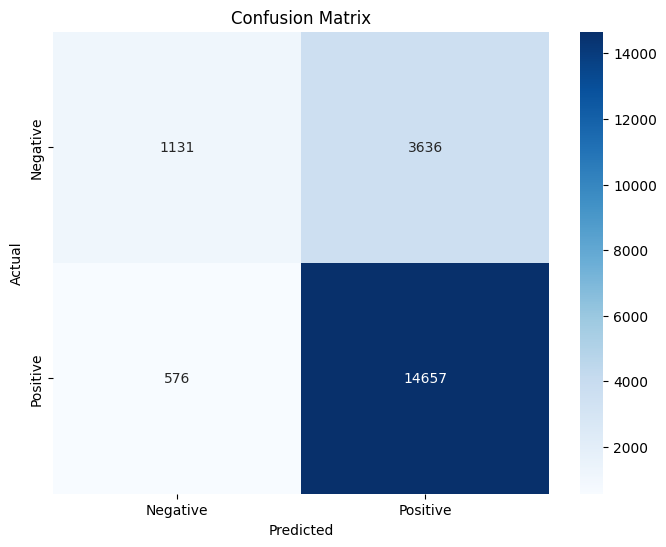

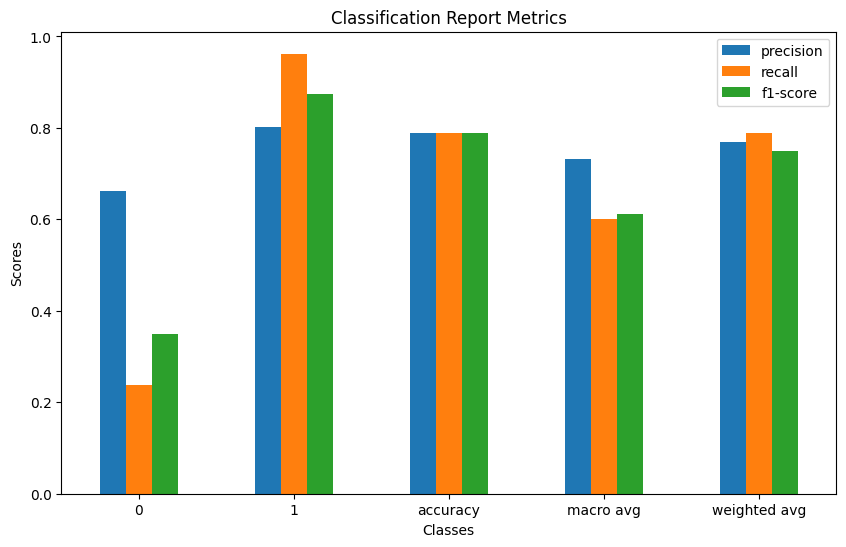

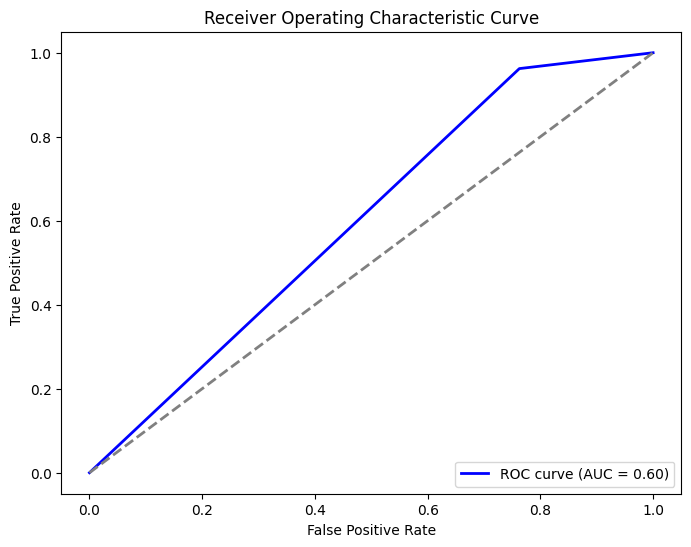

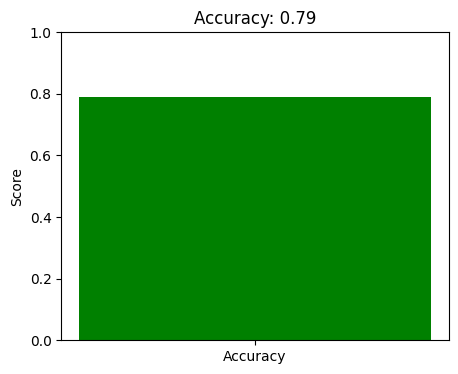

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Assuming 'df' has the columns 'Positive' (actual sentiment) and 'sentiment' (predicted sentiment)

# Map 'Positive' to 1 and 'Negative' to 0
y_true = df['Positive']
y_pred = df['sentiment']

# 1. Confusion Matrix (Heatmap)
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification report metrics
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.show()

# 3. ROC Curve (Receiver Operating Characteristic Curve)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 4. Accuracy Plot
accuracy = (y_true == y_pred).mean()

# Plot accuracy as a bar chart
plt.figure(figsize=(5, 4))
plt.bar(['Accuracy'], [accuracy], color='green')
plt.ylim(0, 1)
plt.title(f'Accuracy: {accuracy:.2f}')
plt.ylabel('Score')
plt.show()


# **`IBM SME NLP`**

# **Tokenization**

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

sentence='i am oshin and i like to study data analytics'

tokens=word_tokenize(sentence)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['i', 'am', 'oshin', 'and', 'i', 'like', 'to', 'study', 'data', 'analytics']


# **Stopwords**

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=set(stopwords.words('english'))
print(stopwords)

{'yourself', "isn't", 'will', 'she', 'mustn', 'on', 'about', 'haven', 'all', "weren't", "needn't", 'off', 'here', 'as', 'same', 'myself', 'that', 'than', 'these', 'her', "haven't", 's', 'ours', 'while', 'through', "wouldn't", 'he', 'which', 'himself', 'have', 'or', 'the', 'up', 'only', 'll', 'weren', 'with', 'do', "she's", 'because', 'theirs', 'such', 'can', "don't", 'over', 'yourselves', 'doing', 'me', 'shan', 'being', "you're", "you'd", 'its', 'nor', 'were', 'under', 'needn', 'you', 'no', "you'll", 'those', 'doesn', "couldn't", "that'll", 'herself', 'an', "wasn't", 'further', 'wouldn', "didn't", 'to', 'some', 'they', 'other', 'don', 'there', 'where', 'this', 'between', 'most', 'hers', 'when', 're', 'now', 'it', 'our', "it's", 'them', 've', 'm', 'him', 'y', 'yours', "mustn't", 'itself', 'been', 'ourselves', 'aren', 'o', 'are', 'before', 'more', "should've", "mightn't", 'very', 'own', 'just', "shouldn't", 'my', 'mightn', 'hasn', 'be', 'by', "won't", 'a', 'above', 'themselves', 'below',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
reviews= ['I love dancing','Bye its my time to go','hey wassup','goodluck', 'have a better day tomorrow']
for review in reviews:
  tokenns=word_tokenize(review)

  #Remove stop words
  filtered_tokens=[token for token in tokens if token.lower() not in stopwords]
  print(filtered_tokens)

['oshin', 'like', 'study', 'data', 'analytics']
['oshin', 'like', 'study', 'data', 'analytics']
['oshin', 'like', 'study', 'data', 'analytics']
['oshin', 'like', 'study', 'data', 'analytics']
['oshin', 'like', 'study', 'data', 'analytics']


# **Lemmatization & Stemming**

# **Bag of words**

In [ ]:
from textblob import TextBlob
import nltk

import pandas as pd
from textblob import TextBlob

tokens=word_tokenize('review')
#rule based sentiment analysis
#define + and - words
positive_words=['great','love','beautiful']
negative_words=['bad','hate','ugly']
def analyze_sentiment_rule_based(review):
  tokens= word_tokenize(review.lower())
  positive_count= sum(1 for token in tokens if token in positive_words)
  negative_count=sum(1 for token in tokens if token in negative_words)
  if positive_count>negative_count:
    return 'positive'
  elif positive_count<negative_count:
    return 'negative'
  else:
    return 'neutral'

reviews=['i hate this app','its very great','its an app']
for review in reviews:
  print(f"'I am in great spirit': {analyze_sentiment_rule_based(review)}")

'I am in great spirit': negative
'I am in great spirit': positive
'I am in great spirit': neutral


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Download required resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Example reviews
reviews = ['I hate this app']

# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

for review in reviews:
    # Tokenize the review
    tokens = word_tokenize(review)

    # Stem the tokens
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Print the results
    print(f"Original Review: {review}")
    print(f"Tokens: {tokens}")
    print(f"Stemmed Tokens: {stemmed_tokens}")
    print(f"Lemmatized Tokens: {lemmatized_tokens}")
    print()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Original Review: I hate this app
Tokens: ['I', 'hate', 'this', 'app']
Stemmed Tokens: ['i', 'hate', 'thi', 'app']
Lemmatized Tokens: ['I', 'hate', 'this', 'app']



In [ ]:
from textblob import TextBlob

def sentiment(reviews):
  for review in reviews:
    score=TextBlob(review).sentiment.polarity
    print(score)
    if score>0:
      print(f"'{review}':positive")
    elif score<0:
      print(f"'{review}':negative")
    else:
      print(f"'{review}':neutral")

# **`Neural Network Based`**

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Tokenize the sentence
positive = ['good', 'amazing']
negative = ['bad', 'poor']

sen = 'very bad class'

# Tokenize the sentence
tokens = word_tokenize(sen.lower())  # Tokenize and convert to lowercase

# Step 2: Check for the presence of positive or negative words
sentiment = 0  # Start with neutral sentiment
for word in tokens:
    if word in positive:
        sentiment = 1  # Positive sentiment
    elif word in negative:
        sentiment = -1  # Negative sentiment

print(f"Sentence: {sen}")
print(f"Sentiment: {sentiment}")  # 1 for Positive, -1 for Negative, 0 for Neutral


# Now, let's build a simple neural network based on the toy example

# Example dataset (you would normally use a larger dataset for training)
texts = ['good movie', 'bad experience', 'amazing product', 'poor quality', 'good quality']
labels = [1, -1, 1, -1, 1]  # 1 for Positive, -1 for Negative

# Step 3: Tokenize and preprocess the texts
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, padding='post')

# Step 4: Encode the labels (Positive/Negative)
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

# Step 5: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build the neural network model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))  # Binary classification (Positive/Negative)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 7: Train the model
model.fit(X_train, y_train, epochs=5, batch_size=2, validation_data=(X_test, y_test), verbose=2)

# Step 8: Evaluate the model
score, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {accuracy*100:.2f}%")

# Step 9: Predict sentiment for the test sentence
test_sentence = 'very bad class'
test_sequence = tokenizer.texts_to_sequences([test_sentence])
test_sequence = pad_sequences(test_sequence, padding='post', maxlen=X.shape[1])

pred = model.predict(test_sequence)
print(f"Predicted sentiment for '{test_sentence}': {'Positive' if pred[0] > 0.5 else 'Negative'}")


Sentence: very bad class
Sentiment: -1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
2/2 - 7s - 3s/step - accuracy: 0.5000 - loss: 0.6909 - val_accuracy: 0.0000e+00 - val_loss: 0.6961
Epoch 2/5
2/2 - 1s - 670ms/step - accuracy: 0.7500 - loss: 0.6854 - val_accuracy: 0.0000e+00 - val_loss: 0.6989
Epoch 3/5
2/2 - 0s - 68ms/step - accuracy: 0.7500 - loss: 0.6792 - val_accuracy: 0.0000e+00 - val_loss: 0.7020
Epoch 4/5
2/2 - 0s - 63ms/step - accuracy: 0.7500 - loss: 0.6718 - val_accuracy: 0.0000e+00 - val_loss: 0.7050
Epoch 5/5
2/2 - 0s - 45ms/step - accuracy: 0.7500 - loss: 0.6633 - val_accuracy: 0.0000e+00 - val_loss: 0.7080
Accuracy: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
Predicted sentiment for 'very bad class': Positive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Sample text data and labels (use more data for better performance)
texts = [
    "This is an amazing product", "I love this phone", "The product is bad", "Worst purchase ever",
    "great experience", "horrible service", "I like this", "I dislike this", "amazing quality", "bad quality"
]
labels = [1, 1, 0, 0, 1, 0, 1, 0, 1, 0]  # 1 for Positive, 0 for Negative sentiment

# Initialize the tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(texts)

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure they all have the same length
X = pad_sequences(sequences, padding='post')

# Labels (binary sentiment classification)
y = np.array(labels)  # Ensure labels are in numpy array format

# Build the neural network model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))  # Embedding layer to convert words to vectors
model.add(SpatialDropout1D(0.2))  # Dropout to avoid overfitting
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer for sequential data
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model (with more epochs and batch size suitable for the dataset)
model.fit(X, y, epochs=5, batch_size=2)

# Test sentence for prediction
test_sentence = ["very bad class"]
test_seq = tokenizer.texts_to_sequences(test_sentence)
test_seq = pad_sequences(test_seq, padding='post', maxlen=X.shape[1])  # Ensure the shape is correct

# Make the prediction
prediction = model.predict(test_seq)

# Apply threshold to classify the sentiment (0.5 as the threshold)
if prediction >= 0.5:
    print(f"Predicted sentiment for '{test_sentence[0]}': Positive")
else:
    print(f"Predicted sentiment for '{test_sentence[0]}': Negative")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_2                  │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7069 - loss: 0.6919
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8306 - loss: 0.6873
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8514 - loss: 0.6751
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8306 - loss: 0.6691
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7056 - loss: 0.6727
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Predicted sentiment for 'very bad class': Negative


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import re

# Assuming df is already loaded with 'reviewText' and 'Positive' columns
# For example, df = pd.read_csv('your_dataset.csv')  # Uncomment if loading from CSV file

# Assuming df contains 'reviewText' (text data) and 'Positive' (sentiment labels)
# df = pd.DataFrame({
#     'reviewText': ['I love this product', 'This is terrible', 'Amazing quality', 'Very bad experience', 'Highly recommend'],
#     'Positive': [1, 0, 1, 0, 1],  # Actual sentiment: 1 = Positive, 0 = Negative
# })

# Preprocessing function to clean the text data
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing to the 'reviewText' column of the dataframe
df['reviewText'] = df['reviewText'].apply(preprocess_text)

# Split into features (X) and labels (y)
texts = df['reviewText'].values
labels = df['Positive'].values  # Use 'Positive' column as labels

# Initialize the tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(texts)

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure they all have the same length
X = pad_sequences(sequences, padding='post')

# Labels (binary sentiment classification)
y = np.array(labels)  # Ensure labels are in numpy array format

# Build the neural network model (Bidirectional LSTM)
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))  # Embedding layer
model.add(SpatialDropout1D(0.2))  # Dropout to avoid overfitting
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))  # Bidirectional LSTM for better context capture
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (with more epochs)
model.fit(X, y, epochs=10, batch_size=4)

# Prediction function
def predict_sentiment(sentence):
    # Preprocess the input sentence
    sentence = preprocess_text(sentence)

    # Convert the input sentence to sequence
    seq = tokenizer.texts_to_sequences([sentence])

    # Pad the sequence to the same length as the training data
    padded_seq = pad_sequences(seq, padding='post', maxlen=X.shape[1])

    # Predict sentiment
    prediction = model.predict(padded_seq)

    # Output the result
    if prediction >= 0.5:
        return "Positive"
    else:
        return "Negative"

# Interactive input
print("Enter a sentence to predict its sentiment (type 'exit' to quit):")

while True:
    user_input = input("> ")

    if user_input.lower() == "exit":
        print("Goodbye!")
        break

    sentiment = predict_sentiment(user_input)
    print(f"Predicted sentiment for '{user_input}': {sentiment}")


Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 235s 46ms/step - accuracy: 0.8489 - loss: 0.3557
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 261s 46ms/step - accuracy: 0.9189 - loss: 0.2014
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 264s 46ms/step - accuracy: 0.9355 - loss: 0.1659
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 270s 48ms/step - accuracy: 0.9513 - loss: 0.1292
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 309s 57ms/step - accuracy: 0.9635 - loss: 0.0954
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 257s 44ms/step - accuracy: 0.9734 - loss: 0.0722
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 223s 45ms/step - accuracy: 0.9787 - loss: 0.0556
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 259s 44ms/step - accuracy: 0.9840 - loss: 0.0439
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 267s 45ms/step - accuracy: 0.9888 - loss: 0.0341
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 257s 44ms/step - accuracy: 0.9905 - loss: 0.0270
Enter a sentence to predict its sentiment (type 'exit' to quit):


# **Neural Network-based sentiment analysis**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
max_features = 10000  # Number of words to consider as features
max_len = 100  # Maximum length of each input sequence

# Loading the IMDB dataset from Keras
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure all input sequences are of the same length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build the neural network model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=2)

# Evaluate the model
score, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict sentiment for a sample review
sample_review = "I loved the movie, it was amazing!"
# Tokenize the sample review (converting words to indices)
word_index = imdb.get_word_index()
sample_review_tokens = [word_index.get(word, 0) for word in sample_review.lower().split()]
# Pad the review to the same length as the training data
sample_review_padded = pad_sequences([sample_review_tokens], maxlen=max_len)

# Predict the sentiment of the sample review
prediction = model.predict(sample_review_padded)
sentiment = "Positive" if prediction >= 0.5 else "Negative"
print(f"Sentiment: {sentiment}")


# **`Using BERT, Transformers`**

In [2]:
!pip install nltk transformers

In [6]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

def preprocess_text(text):
    sentences = sent_tokenize(text)
    return sentences

def analyze_sentiment(text):
    sentences = preprocess_text(text)
    results = []
    for sentence in sentences:
        sentiment = sentiment_pipeline(sentence)
        results.append((sentence, sentiment[0]['label'], sentiment[0]['score']))
    return results

text = "I love the new phone. The battery life is amazing! However, the camera quality could be better. Oshin. Hey look at me. Do you remember? Please buy me a chocolate. I hate you idiot."
sentiment_results = analyze_sentiment(text)

for sentence, label, score in sentiment_results:
    print(f"Sentence: {sentence}")
    print(f"Sentiment: {label}, Score: {score}")
    print("-" * 50)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
Device set to use cpu


Sentence: I love the new phone.
Sentiment: 5 stars, Score: 0.8152029514312744
--------------------------------------------------
Sentence: The battery life is amazing!
Sentiment: 5 stars, Score: 0.8153871893882751
--------------------------------------------------
Sentence: However, the camera quality could be better.
Sentiment: 3 stars, Score: 0.621445894241333
--------------------------------------------------
Sentence: Oshin.
Sentiment: 3 stars, Score: 0.32453295588493347
--------------------------------------------------
Sentence: Hey look at me.
Sentiment: 5 stars, Score: 0.4124619662761688
--------------------------------------------------
Sentence: Do you remember?
Sentiment: 5 stars, Score: 0.26115894317626953
--------------------------------------------------
Sentence: Please buy me a chocolate.
Sentiment: 1 star, Score: 0.4337516129016876
--------------------------------------------------
Sentence: I hate you idiot.
Sentiment: 1 star, Score: 0.7333212494850159
---------------

In [ ]:
# 1. torch (PyTorch):
# Purpose: PyTorch is an open-source machine learning library used for building and training neural networks. It supports dynamic computation graphs, making it easier to experiment with and modify models.
# Usage in the code: It's used to run the BERT model for sentiment analysis, as BERT is a neural network-based model implemented in PyTorch.

# 2. transformers (Hugging Face):
# Purpose: The transformers library by Hugging Face provides state-of-the-art machine learning models like BERT, GPT, T5, etc., pre-trained on large datasets for tasks like text classification, translation, and question answering.
# Usage in the code: The library is used to load the pre-trained BERT model (nlptown/bert-base-multilingual-uncased-sentiment), which performs sentiment analysis on text.

# 3. nltk (Natural Language Toolkit):
# Purpose: NLTK is a Python library used for working with human language data (text). It provides tools for text processing, such as tokenization, part-of-speech tagging, and parsing.
# Usage in the code: NLTK’s sent_tokenize() function is used to split the input text into individual sentences for processing by the sentiment analysis model.

# 4. BERT Model for Sentiment Analysis (nlptown/bert-base-multilingual-uncased-sentiment):
# Purpose: BERT (Bidirectional Encoder Representations from Transformers) is a powerful transformer model for understanding language context. The specific model (nlptown/bert-base-multilingual-uncased-sentiment) is pre-trained to classify the sentiment of text in multiple languages.
# Usage in the code: The model is used to classify the sentiment (positive, negative, etc.) of each sentence, returning both the label and the confidence score.

# In short, torch runs the neural network, transformers provides the BERT model, and nltk helps with breaking text into sentences for analysis.